```
Empirically evaluating Multiple Imputation by Chained Equations
```

In [ ]:
!pip install pydataset
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

# Function to print features missigness report

def missingnessreport(data):
  total_m = data.isnull().sum()
  missing = total_m[total_m > 0]
  print(f'\nSummary of missingness')
  print('----------------------')
  print(missing.sort_values(ascending=False))
  print('---------------------------------------')
  print(f'\nNumber of features with missingness: {len(missing)}')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/support2/kaggleData/support2.csv'

In [ ]:
data = pd.read_csv(path)
data.shape

(9105, 47)

```
Categorized breakdown of the support2 variables.
------------------------------------------------
```

```
+----------------+-----------------------------------------+---------------------------+
| Category       | Variable Name                           | Description               |
+----------------+-----------------------------------------+---------------------------+
| Demographics   | age                                      | Age in years             |
|                | sex                                      | Gender                   |
|                | race                                     | Race                     |
|                | income                                   | Income bracket           |
|                | edu                                      | Education level          |
+----------------+-----------------------------------------+---------------------------+
| Physiology     | meanbp                                   | Mean BP (day 3)          |
|                | wblc                                     | WBC count (day 3)        |
|                | hrt                                      | Heart rate (day 3)       |
|                | resp                                     | Respiration rate (day 3) |
|                | temp                                     | Temperature (day 3)      |
|                | pafi                                     | PaO₂/FiO₂ ratio (day 3)  |
|                | alb                                      | Albumin (day 3)          |
|                | bili                                     | Bilirubin (day 3)        |
|                | crea                                     | Creatinine (day 3)       |
|                | sod                                      | Sodium (day 3)           |
|                | ph                                       | Arterial pH (day 3)      |
|                | glucose                                  | Glucose (day 3)          |
|                | bun                                      | BUN (day 3)              |
|                | urine                                    | Urine output (day 3)     |
+----------------+-----------------------------------------+---------------------------+
| Physio Scores  | sps                                      | SUPPORT physiology score |
|                | aps                                      | APACHE III score         |
|                | scoma                                    | Coma score               |
|                | avtisst                                  | Avg TISS score (3–25)    |
+----------------+-----------------------------------------+---------------------------+
| Comorbidities  | dzgroup                                  | Disease subgroup         |
|                | dzclass                                  | Disease class            |
|                | num.co                                   | # Comorbidities          |
|                | diabetes                                 | Diabetes comorbidity     |
|                | dementia                                 | Dementia comorbidity     |
|                | ca                                       | Cancer status            |
|                | adlsc                                    | Imputed ADL (surrogate)  |
+----------------+-----------------------------------------+---------------------------+
| Costs          | charges                                  | Hospital charges         |
|                | totcst                                   | Total RCC cost           |
|                | totmcst                                  | Total micro cost         |
+----------------+-----------------------------------------+---------------------------+
| Stay & Timing  | slos                                     | Entry to discharge (days)|
|                | d.time                                   | Follow-up time (days)    |
|                | hday                                     | Study entry hospital day |
|                | dnrday                                   | Day of DNR order         |
+----------------+-----------------------------------------+---------------------------+
| Predictions    | surv2m                                   | Model 2-month estimate   |
|                | surv6m                                   | Model 6-month estimate   |
|                | prg2m                                    | Physician 2-month pred   |
|                | prg6m                                    | Physician 6-month pred   |
|                | dnr                                      | DNR order status         |
+----------------+-----------------------------------------+---------------------------+
| Outcomes       | death                                    | Death by Dec 1994        |
|                | hospdead                                 | In-hospital death        |
|                | sfdm2                                    | Functional disability    |
+----------------+-----------------------------------------+---------------------------+
| ADLs           | adlp                                     | ADL (patient)            |
|                | adls                                     | ADL (surrogate)          |
+----------------+-----------------------------------------+---------------------------+
| Identifiers    | id                                       | Patient ID               |
+----------------+-----------------------------------------+---------------------------+
```


In [ ]:
data.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [ ]:
missingnessreport(data)


Summary of missingness
----------------------
adlp       5641
urine      4862
glucose    4500
bun        4352
totmcst    3475
alb        3372
income     2982
adls       2867
bili       2601
pafi       2325
ph         2284
prg2m      1649
edu        1634
prg6m      1633
sfdm2      1400
totcst      888
wblc        212
charges     172
avtisst      82
crea         67
race         42
dnrday       30
dnr          30
scoma         1
sps           1
meanbp        1
aps           1
surv2m        1
surv6m        1
resp          1
hrt           1
temp          1
sod           1
dtype: int64
---------------------------------------

Number of features with missingness: 33


In [ ]:
# manual imputation as prescribed in the data description:
# -------------------------------------------------------

# You may want to use the following normal values that have been found to be satisfactory in imputing missing baseline physiologic data:

# Baseline Variable	Normal Fill-in Value
# Serum albumin	3.5
# PaO2/FiO2 ratio (pafi)	333.3
# Bilirubin	1.01
# Creatinine	1.01
# BUN	6.51
# White blood count	9 (thousands)
# Urine output	2502

normal_values = {
    'alb': 3.5,
    'pafi': 333.3,
    'bili': 1.01,
    'crea': 1.01,
    'bun': 6.51,
    'wblc': 9,
    'urine': 2502
}

data.fillna(value=normal_values, inplace=True)

missingnessreport(data)


Summary of missingness
----------------------
adlp       5641
glucose    4500
totmcst    3475
income     2982
adls       2867
ph         2284
prg2m      1649
edu        1634
prg6m      1633
sfdm2      1400
totcst      888
charges     172
avtisst      82
race         42
dnr          30
dnrday       30
scoma         1
sps           1
aps           1
meanbp        1
surv6m        1
surv2m        1
hrt           1
sod           1
resp          1
temp          1
dtype: int64
---------------------------------------

Number of features with missingness: 26


<Axes: xlabel='glucose', ylabel='Count'>

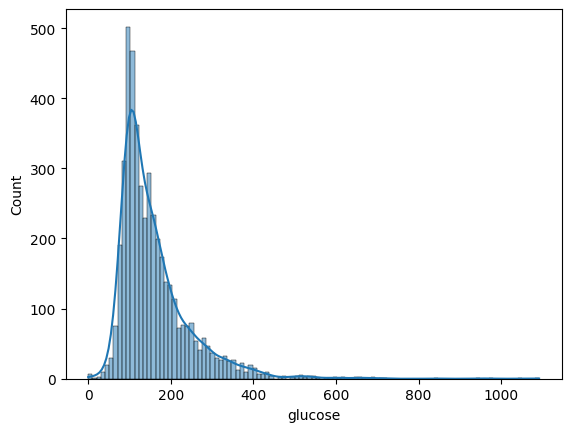

In [ ]:
sns.histplot(data = data, x = 'glucose', kde = True)

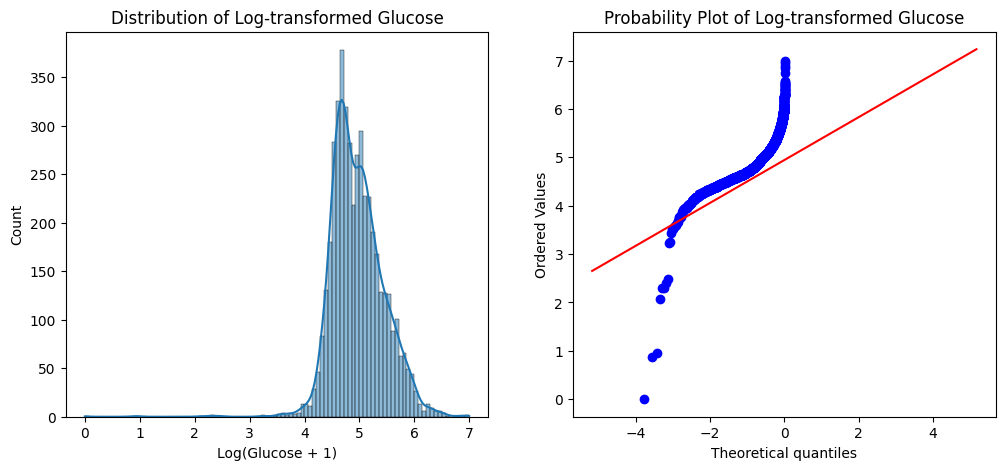

Skewness of original glucose: 2.5779633405466065
Skewness of log-transformed glucose: -0.21567882339251906


In [ ]:
# --- 1. Logarithmic Transformation: "glugose" ---

from scipy import stats


data['glucose_log'] = np.log1p(data['glucose'])  # Using log1p to handle 0 values if present

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['glucose_log'], kde=True)
plt.title('Distribution of Log-transformed Glucose')
plt.xlabel('Log(Glucose + 1)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
stats.probplot(data['glucose_log'], plot=plt)

# Get the limits of the theoretical quantiles to draw the line
quantiles = stats.norm.ppf([0.25, 0.75])
ordered_values_at_quantiles = np.percentile(data['glucose_log'].dropna(), [25, 75])

# Calculate the slope and intercept of the reference line
slope = (ordered_values_at_quantiles[1] - ordered_values_at_quantiles[0]) / (quantiles[1] - quantiles[0])
intercept = ordered_values_at_quantiles[0] - slope * quantiles[0]

# Generate points for the reference line
x = np.linspace(quantiles.min() - 4.5, quantiles.max() + 4.5, 100)
y = slope * x + intercept

# Plot the reference line
plt.plot(x, y, 'r-')

plt.title('Probability Plot of Log-transformed Glucose')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

print("Skewness of original glucose:", data['glucose'].skew())
print("Skewness of log-transformed glucose:", data['glucose_log'].skew())

In [ ]:
miscols = data.isnull().sum()
miscols = miscols[miscols <= 42]

columnstoconsider = [key for key, values in miscols.items() if int(miscols[key]) != 0]
data = data.dropna(subset = columnstoconsider)
data = data.dropna(subset = ['avtisst', 'charges']) # sub 5% ~ negligible.
missingnessreport(data)


Summary of missingness
----------------------
adlp       5428
glucose    4404
totmcst    3340
income     2866
adls       2725
ph         2201
prg2m      1568
edu        1565
prg6m      1552
sfdm2      1341
totcst      778
dtype: int64
---------------------------------------

Number of features with missingness: 11


```
> This is an important point to keep in mind during EDA and
data cleaning, as dropping rows based on missingness in
certain variables can have a ripple effect on the apparent
missingness in other variables.
```

In [ ]:
miscols = data.isnull().sum()
miscols = miscols[miscols > 0]

columnstoconsider = [key for key, values in miscols.items() if int(miscols[key]) != 0]
columnstoconsider

['edu',
 'income',
 'totcst',
 'totmcst',
 'prg2m',
 'prg6m',
 'ph',
 'glucose',
 'adlp',
 'adls',
 'sfdm2']

In [ ]:
missingnessreport(data)


Summary of missingness
----------------------
adlp       5428
glucose    4404
totmcst    3340
income     2866
adls       2725
ph         2201
prg2m      1568
edu        1565
prg6m      1552
sfdm2      1341
totcst      778
dtype: int64
---------------------------------------

Number of features with missingness: 11




---



## ***Empirically evaluating Multiple Imputation by Chained Equations***

```
Features to empirically test MICE on
------------------------------------
adlp       5582
glucose    4461
totmcst    3420
income     2933

```

In [ ]:
dmain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/support2/kaggleData/support2.csv')

dmain.shape

(9105, 47)


```
Broad steps
-----------

key-idea:
- Drop all the null values from the features of interest: adlp, glucose, totmcost, income:
  - If atleast 1000 rows remain (which is full):
    - split the dataset into 50-50 A50 and B50
        - Use A50 as training dataset for MICE
          - Introduce missigness ~ on 25% of B50
            - Store that 25% for evaluation after next step
            | - Perform MICE to impute the missing values then evaluate using:
            - the stored 25%.
```

In [ ]:
subset_ = ['adlp', 'glucose', 'totmcst', 'income']

# iterative script that returns the number of intact rows () after every loop over the features.

def iter_loop4summary(data, features):
  for i in features:
    data = data.dropna(subset = [i])
    print(f'Intact rows after dropping {i}: {data.shape[0]}')


iter_loop4summary(dmain, subset_)

Intact rows after dropping adlp: 3464
Intact rows after dropping glucose: 1765
Intact rows after dropping totmcst: 1531
Intact rows after dropping income: 1216


In [ ]:
dmain.shape

(9105, 47)

In [ ]:
dmain = dmain.dropna(subset = ['adlp', 'glucose', 'totmcst', 'income'])
print(dmain.shape)
missingnessreport(dmain)

(1216, 47)

Summary of missingness
----------------------
alb        380
pafi       323
ph         315
bili       306
adls       268
urine      155
sfdm2      138
prg6m      135
prg2m      135
avtisst     28
wblc        21
edu         19
charges     16
bun          4
dtype: int64
---------------------------------------

Number of features with missingness: 14


In [ ]:
normal_values = {
    'alb': 3.5,
    'pafi': 333.3,
    'bili': 1.01,
    'crea': 1.01,
    'bun': 6.51,
    'wblc': 9,
    'urine': 2502
}

dmain.fillna(value=normal_values, inplace=True)

missingnessreport(dmain)


Summary of missingness
----------------------
ph         315
adls       268
sfdm2      138
prg2m      135
prg6m      135
avtisst     28
edu         19
charges     16
dtype: int64
---------------------------------------

Number of features with missingness: 8


In [ ]:
dmain = dmain.dropna(subset = ['avtisst', 'edu', 'charges'])

missingnessreport(dmain)
dmain.shape


Summary of missingness
----------------------
ph       294
adls     252
sfdm2    128
prg2m    122
prg6m    122
dtype: int64
---------------------------------------

Number of features with missingness: 5


(1153, 47)

In [ ]:

sfdm2_mapping = {
    "<2 mo. follow-up": 4,
    "no(M2 and SIP pres)": 1,
    "adl>=4 (>=5 if sur)": 2,
    "SIP>=30": 3,
}

dmain["sfdm2_mapped"] = dmain["sfdm2"].map(sfdm2_mapping)


dmain["sfdm2_mapped"] = dmain["sfdm2_mapped"].fillna(5).astype(int)
dmain.drop(columns = ['sfdm2'], inplace = True)
dmain["sfdm2_mapped"].value_counts()

,count
sfdm2_mapped,
1,616
4,167
3,156
5,128
2,86


In [ ]:
missingnessreport(dmain)


Summary of missingness
----------------------
ph       294
adls     252
prg6m    122
prg2m    122
dtype: int64
---------------------------------------

Number of features with missingness: 4


```
Random forest was chosen for imputation of the variable 'adls' because it performed well. Scoring good MSE.
```

In [ ]:
# using random forest for imputing the following missingness. last resort.

# Summary of missingness
# ----------------------
# ph       294
# adls     252
# prg6m    122
# prg2m    122
# dtype: int64
# ---------------------------------------

# Number of features with missingness: 4

from sklearn.ensemble import RandomForestRegressor

def impute_rf(df, column_to_impute):
    train_df = df[df[column_to_impute].notna()].copy()
    test_df = df[df[column_to_impute].isna()].copy()

    X_train = train_df.drop(columns=[column_to_impute])
    y_train = train_df[column_to_impute]
    X_test = test_df.drop(columns=[column_to_impute])

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train.select_dtypes(include=[np.number]), y_train)

    preds = rf.predict(X_test.select_dtypes(include=[np.number]))
    preds_rounded = np.round(preds)

    df.loc[df[column_to_impute].isna(), column_to_impute] = preds_rounded
    print(f"Imputed missing values for '{column_to_impute}' using Random Forest.")
    return df

impute_rf(dmain, 'adls')
missingnessreport(dmain)

Imputed missing values for 'adls' using Random Forest.

Summary of missingness
----------------------
ph       294
prg2m    122
prg6m    122
dtype: int64
---------------------------------------

Number of features with missingness: 3


<Axes: xlabel='ph', ylabel='Count'>

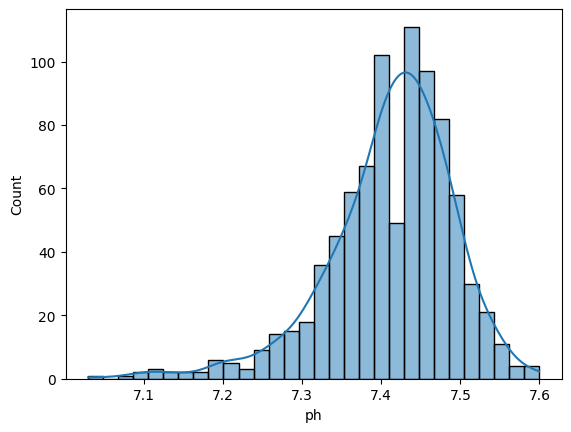

In [ ]:
sns.histplot(data = dmain, x = 'ph', kde = True)

<Axes: xlabel='prg2m'>

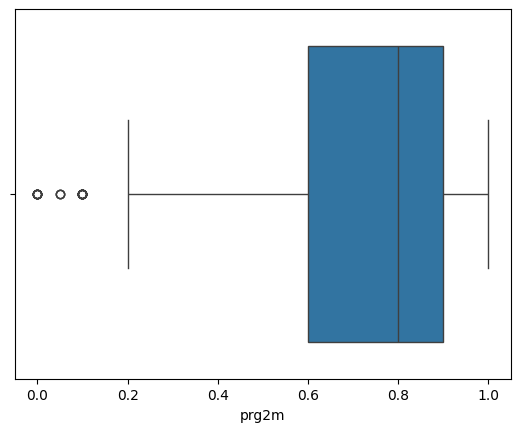

In [ ]:
sns.boxplot(data = dmain, x = 'prg2m')

<Axes: xlabel='prg6m'>

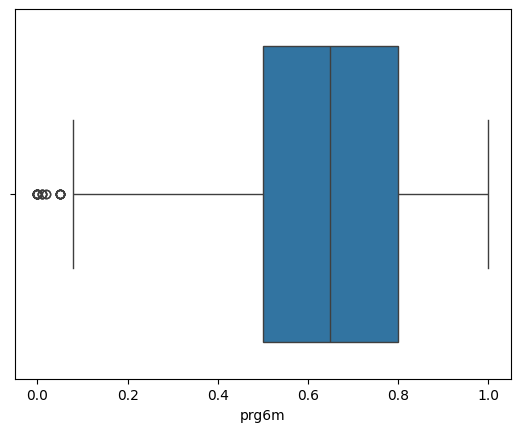

In [ ]:
sns.boxplot(data = dmain, x = 'prg6m')

<Axes: >

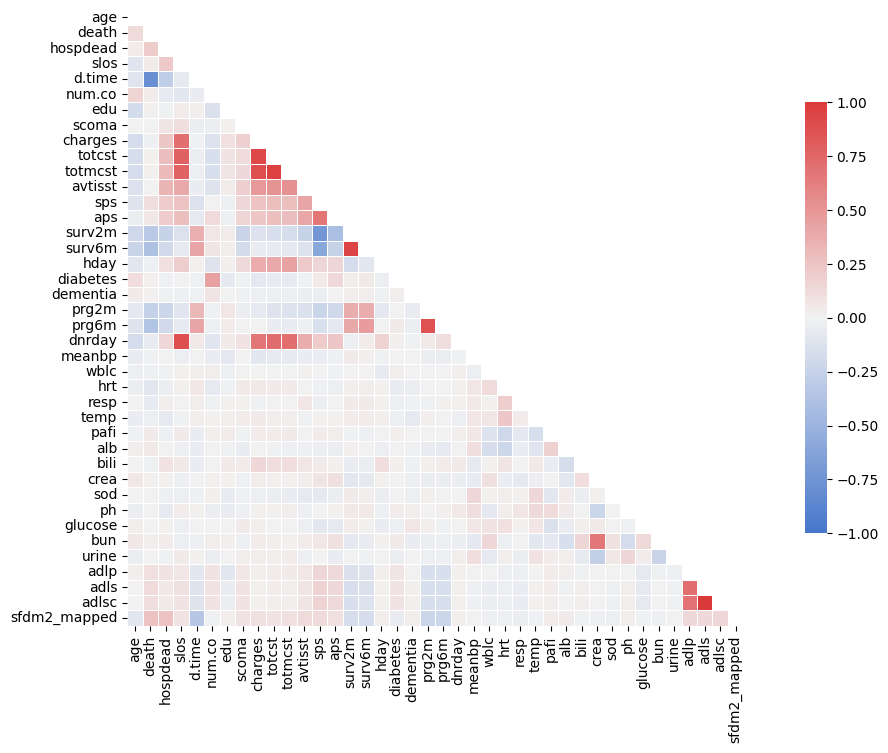

In [ ]:
numerv = dmain.select_dtypes(include=['float','int'])
corr = numerv.corr()

plt.figure(figsize=(16,8))

cmap = sns.diverging_palette(255, 12, as_cmap = True)
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, cmap = cmap, mask = mask,
            square = True, center = 0, vmin = -1, vmax = 1,
            cbar_kws = {'shrink':0.7}, annot = False,
            linewidths = 0.5)

In [ ]:
print("Descriptive Statistics for 'ph' (Non-Missing):")
print(dmain['ph'].dropna().describe())
print("\nVariance for 'ph' (Non-Missing):", dmain['ph'].dropna().var())

print("\nDescriptive Statistics for 'prg6m' (Non-Missing):")
print(dmain['prg6m'].dropna().describe())
print("\nVariance for 'prg6m' (Non-Missing):", dmain['prg6m'].dropna().var())

print("\nDescriptive Statistics for 'prg2m' (Non-Missing):")
print(dmain['prg2m'].dropna().describe())
print("\nVariance for 'prg2m' (Non-Missing):", dmain['prg2m'].dropna().var())

Descriptive Statistics for 'ph' (Non-Missing):
count    859.000000
mean       7.411683
std        0.079734
min        7.029297
25%        7.369141
50%        7.419922
75%        7.459961
max        7.599609
Name: ph, dtype: float64

Variance for 'ph' (Non-Missing): 0.006357435301367407

Descriptive Statistics for 'prg6m' (Non-Missing):
count    1031.000000
mean        0.609881
std         0.264485
min         0.000000
25%         0.500000
50%         0.650000
75%         0.800000
max         1.000000
Name: prg6m, dtype: float64

Variance for 'prg6m' (Non-Missing): 0.06995241542038162

Descriptive Statistics for 'prg2m' (Non-Missing):
count    1031.000000
mean        0.751387
std         0.219064
min         0.000000
25%         0.600000
50%         0.800000
75%         0.900000
max         1.000000
Name: prg2m, dtype: float64

Variance for 'prg2m' (Non-Missing): 0.047989208866088894


In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Assuming 'dmain' is your original pandas DataFrame that needs imputation

# --- Configuration (should match your evaluation script settings) ---
# The features you evaluated and want to ensure are imputed (these must be numeric)
features_evaluated_for_imputation = ['ph', 'prg2m', 'prg6m']
# Estimator and random state used in evaluation
imputer_estimator = BayesianRidge()
imputer_random_state = 42
imputer_max_iter = 100 # Use the same max_iter as in evaluation

# --- Identify Numeric Columns for Imputation ---
# The imputer works on numeric data. It's best practice to apply it to
# all numeric columns in your dataframe, as MICE models relationships
# between features.
numeric_cols = dmain.select_dtypes(include=[np.number]).columns.tolist()

# Optional: Check if the features you evaluated are indeed numeric in the dataframe
if not all(feature in numeric_cols for feature in features_evaluated_for_imputation):
    non_numeric_features_found = [f for f in features_evaluated_for_imputation if f not in numeric_cols]
    print(f"Warning: Features {non_numeric_features_found} were intended for imputation but are not numeric in the dataframe. They will be skipped.")
    # You might want to stop execution or adjust features_evaluated_for_imputation here

print(f"Applying MICE imputation to all numeric columns: {numeric_cols}")

# --- Apply MICE Imputation ---

# Create an instance of the IterativeImputer with the chosen parameters
mice_imputer = IterativeImputer(
    estimator=imputer_estimator,
    random_state=imputer_random_state,
    max_iter=imputer_max_iter
)

print("\nApplying MICE imputation to the numeric columns...")

# Fit and transform the imputer on the numeric subset of dmain.
# This learns the imputation model from the data and fills in the NaNs.
# It returns a numpy array.
imputed_data_array = mice_imputer.fit_transform(dmain[numeric_cols])

print("Imputation complete.")

# --- Update the Original DataFrame ---

# Convert the imputed numpy array back to a DataFrame,
# ensuring columns and index align with the original dmain.
imputed_df_numeric = pd.DataFrame(imputed_data_array, columns=numeric_cols, index=dmain.index)

# Overwrite the original numeric columns in dmain with the imputed values
# This replaces the NaNs with the MICE predictions.
dmain[numeric_cols] = imputed_df_numeric

print("\nDataFrame 'dmain' has been updated with imputed values in numeric columns.")

# --- Verification ---

# Check if there are any missing values left in the features you targeted
print("\nChecking for missing values in the columns that were intended for imputation:")
# Only check columns that were actually numeric and targeted
cols_to_check = [f for f in features_evaluated_for_imputation if f in numeric_cols]
print(dmain[cols_to_check].isnull().sum())

# Optionally, check the descriptive statistics of the imputed columns
# to see how they look after imputation compared to the non-missing stats
print("\nDescriptive Statistics for the columns that were imputed:")
print(dmain[cols_to_check].describe())

Applying MICE imputation to all numeric columns: ['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'adlsc', 'sfdm2_mapped']

Applying MICE imputation to the numeric columns...
Imputation complete.

DataFrame 'dmain' has been updated with imputed values in numeric columns.

Checking for missing values in the columns that were intended for imputation:
ph       0
prg2m    0
prg6m    0
dtype: int64

Descriptive Statistics for the columns that were imputed:
                ph        prg2m        prg6m
count  1153.000000  1153.000000  1153.000000
mean      7.414755     0.751281     0.610736
std       0.069391     0.207612     0.250462
min       7.029297     0.000000     0.000000
25%       7.389648     0.70000

```
Descriptive Stats to compare MICE predictions.
----------------------------------------------

Descriptive Statistics for 'ph' (Non-Missing):
count    859.000000
mean       7.411683
std        0.079734
min        7.029297
25%        7.369141
50%        7.419922
75%        7.459961
max        7.599609
Name: ph, dtype: float64

Variance for 'ph' (Non-Missing): 0.006357435301367407

Descriptive Statistics for 'prg6m' (Non-Missing):
count    1031.000000
mean        0.609881
std         0.264485
min         0.000000
25%         0.500000
50%         0.650000
75%         0.800000
max         1.000000
Name: prg6m, dtype: float64

Variance for 'prg6m' (Non-Missing): 0.06995241542038162

Descriptive Statistics for 'prg2m' (Non-Missing):
count    1031.000000
mean        0.751387
std         0.219064
min         0.000000
25%         0.600000
50%         0.800000
75%         0.900000
max         1.000000
Name: prg2m, dtype: float64

Variance for 'prg2m' (Non-Missing): 0.047989208866088894


---------------------------------------------------------
Descriptive Statistics for the columns that were imputed:

                ph        prg2m        prg6m
count  1153.000000  1153.000000  1153.000000
mean      7.414755     0.751281     0.610736
std       0.069391     0.207612     0.250462
min       7.029297     0.000000     0.000000
25%       7.389648     0.700000     0.500000
50%       7.423152     0.800000     0.633997
75%       7.449219     0.900000     0.800000
max       7.599609     1.000000     1.000000

```

```
Conclusion
----------
Based on the comparison of the MICE imputation RMSE with the standard
deviation of the original non-missing values for each of the three
features (ph, prg2m, and prg6m), the MICE imputation appears to be
performing well.
```

In [ ]:
missingnessreport(dmain)


Summary of missingness
----------------------
Series([], dtype: int64)
---------------------------------------

Number of features with missingness: 0


In [ ]:
# obj = dmain.select_dtypes(include = 'object')
# obj_ = obj.columns

# for objects in obj_:
#   print('-----------------------------')
#   print(dmain[objects].value_counts())

In [ ]:
# Optional: Testing the validity using masked sections (hold out sets)// may find future applications.

# import pandas as pd
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer # Needed for IterativeImputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Assume 'subset_df' is the pandas DataFrame you provided (the one with 1153 rows, no NaNs)
# # For demonstration, let's create a dummy dataframe structure like yours
# # In your actual code, 'subset_df' would be loaded or passed in.
# # For example: subset_df = dmain.iloc[833:833+1153].copy() # Or however you got this subset

# # --- Define Evaluation Function ---

# def evaluate_mice_imputation_on_complete_data(
#     df_complete,         # The input dataframe with no missing values
#     target_col,          # The single numeric column to induce missingness and evaluate
#     missing_rate=0.25,   # Percentage of values to set to NaN in the test set target_col
#     test_size=0.5,       # Proportion of data to use as the test set (where NaNs are induced)
#     random_state=42,
#     max_iter=100
# ):
#     """
#     Evaluates MICE imputation by simulating missingness in a complete dataset
#     for a single target column.

#     Args:
#         df_complete (pd.DataFrame): DataFrame with no missing values.
#         target_col (str): Name of the numeric column to simulate missingness in.
#         missing_rate (float): Proportion of values in target_col of the test set
#                               to set to NaN.
#         test_size (float): Proportion of the complete data to use as the test set
#                            (where missingness will be induced).
#         random_state (int): Random state for reproducibility.
#         max_iter (int): Max iterations for IterativeImputer.

#     Returns:
#         pd.DataFrame: DataFrame with MAE and RMSE results for the target_col,
#                       or None if target_col is not numeric.
#     """
#     print(f"Evaluating MICE imputation for '{target_col}' by simulating missingness...")

#     # 1. Identify numeric columns
#     numeric_cols = df_complete.select_dtypes(include=[np.number]).columns.tolist()

#     if target_col not in numeric_cols:
#         print(f"Warning: Target column '{target_col}' is not numeric. Skipping evaluation.")
#         return None

#     # Ensure the target column is the first one in the numeric list for easier indexing later
#     numeric_cols.remove(target_col)
#     numeric_cols.insert(0, target_col)
#     # Reorder df_complete to match this column order for imputation
#     df_complete_numeric = df_complete[numeric_cols]


#     # 2. Split the complete data into train and test sets
#     # We split the *numeric* part directly after reordering
#     train_numeric, test_numeric_original = train_test_split(
#         df_complete_numeric,
#         test_size=test_size,
#         random_state=random_state
#     )

#     # 3. Create a copy of the test set to introduce missingness
#     test_numeric_missing = test_numeric_original.copy()

#     # 4. Identify locations to introduce missingness in the target column of the test set
#     n_rows_test = len(test_numeric_missing)
#     n_missing = int(n_rows_test * missing_rate)
#     # Ensure we don't try to introduce more missingness than available rows
#     n_missing = min(n_missing, n_rows_test)

#     # Randomly select indices in the test set to set to NaN
#     if n_rows_test > 0 and n_missing > 0:
#         missing_indices_in_test = np.random.choice(
#             test_numeric_missing.index,
#             size=n_missing,
#             replace=False # Ensure distinct indices
#         )
#     else:
#          print(f"Warning: Cannot induce missingness (test size={n_rows_test}, missing rate={missing_rate}). Skipping.")
#          return None


#     # 5. Store the true values from these locations BEFORE setting them to NaN
#     y_true = test_numeric_original.loc[missing_indices_in_test, target_col].values

#     # 6. Introduce NaN values in the target column of the test set copy
#     test_numeric_missing.loc[missing_indices_in_test, target_col] = np.nan

#     # 7. Combine the training data (complete) and the test data with induced missingness
#     df_for_imputation = pd.concat([train_numeric, test_numeric_missing], ignore_index=True)

#     # 8. Perform MICE imputation on the combined data
#     mice_imp = IterativeImputer(
#         estimator=BayesianRidge(),
#         random_state=random_state,
#         max_iter=max_iter
#     )

#     # Fit and transform the imputer. It will impute NaNs in test_numeric_missing.
#     imputed_data_array = mice_imp.fit_transform(df_for_imputation)

#     # Convert the result back to a DataFrame for easier indexing
#     imputed_df = pd.DataFrame(imputed_data_array, columns=numeric_cols)

#     # 9. Extract the imputed values for the locations where NaNs were introduced
#     # The imputed values for the original test set rows start after the training rows
#     imputed_test_set_data = imputed_df.iloc[len(train_numeric):]

#     # Get the imputed values specifically for the locations where NaNs were introduced
#     # We need to map the original test set index back to the imputed_test_set_data's index
#     # Since we used ignore_index=True in concat, the test set indices start from 0
#     # in the imputed_test_set_data corresponding to their order in test_numeric_original.
#     # We need the *positional* index in test_numeric_original that maps to missing_indices_in_test
#     # A simpler way is to just filter the imputed test set data using the original index
#     imputed_preds_at_missing_locs = imputed_test_set_data.loc[missing_indices_in_test, target_col].values


#     # 10. Evaluate the imputed values against the true values
#     mae = mean_absolute_error(y_true, imputed_preds_at_missing_locs)
#     rmse = mean_squared_error(y_true, imputed_preds_at_missing_locs) ** 0.5

#     print(f"Evaluation complete for '{target_col}': MAE = {mae:.6f}, RMSE = {rmse:.6f}")

#     return pd.DataFrame({
#         'Method': [f'MICE ({target_col})'],
#         'MAE': [mae],
#         'RMSE': [rmse]
#     })

# # --- Perform Evaluation for Specified Features ---

# # Assuming 'subset_df' is your 1153-row complete DataFrame
# # Replace with your actual DataFrame variable name if different
# # Example: subset_df = your_loaded_dataframe.copy() # Make sure it's the specific subset

# # The numeric features you want to evaluate imputation for
# # Excluded 'income' as it is non-numeric
# features_to_evaluate_imputation = ['adlp', 'glucose', 'totmcst'] # Assuming 'totmcost' is 'totmcst'

# all_evaluation_results = []

# # Ensure subset_df is defined before running the loop
# # Example Placeholder:
# # data = {'col1': np.random.rand(1153), 'adlp': np.random.rand(1153), 'glucose': np.random.rand(1153)*100, 'totmcst': np.random.rand(1153)*1000, 'sex': ['M']*500 + ['F']*653, 'income': ['High']*300 + ['Low']*853}
# # subset_df = pd.DataFrame(data)
# # print("\n--- Using a dummy complete dataframe for demonstration ---")
# # print(subset_df.info())
# # print("-" * 30)


# # --- Start the evaluation loop ---
# print(f"\n--- Starting MICE Imputation Evaluation on Complete Subset ---")

# for feature in features_to_evaluate_imputation:
#     # Pass your actual complete subset DataFrame here
#     eval_results = evaluate_mice_imputation_on_complete_data(
#         subset_df.copy(), # Pass a copy to prevent modification within the function
#         feature,
#         test_size=0.5,      # Use 50% for test/evaluation
#         missing_rate=0.25,  # Induce 25% missingness in the test set's target column
#         random_state=42,
#         max_iter=100
#     )
#     if eval_results is not None:
#         all_evaluation_results.append(eval_results)

# print("\n--- Evaluation Summary ---")
# if all_evaluation_results:
#     summary_df = pd.concat(all_evaluation_results, ignore_index=True)
#     print(summary_df)
# else:
#     print("No evaluations were successfully completed.")